In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
housedata = pd.read_csv('//Users//winnie//Library//CloudStorage//OneDrive-NanyangTechnologicalUniversity//y1s2//sc1015//labs//lab 5//train.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
sp = pd.DataFrame(housedata['SalePrice']) #predictor
ca = pd.DataFrame(housedata['CentralAir']) #response

sp_train, sp_test, ca_train, ca_test = train_test_split(sp, ca, test_size = 0.25, random_state=27)

print("Train Set :", ca_train.shape, sp_train.shape)
print("Test Set  :", ca_test.shape, sp_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


In [5]:
# Decision Tree using Train Data with max depth 3
dectree1 = DecisionTreeClassifier(max_depth = 3)  
dectree1.fit(sp_train, ca_train)                    

DecisionTreeClassifier(max_depth=3)

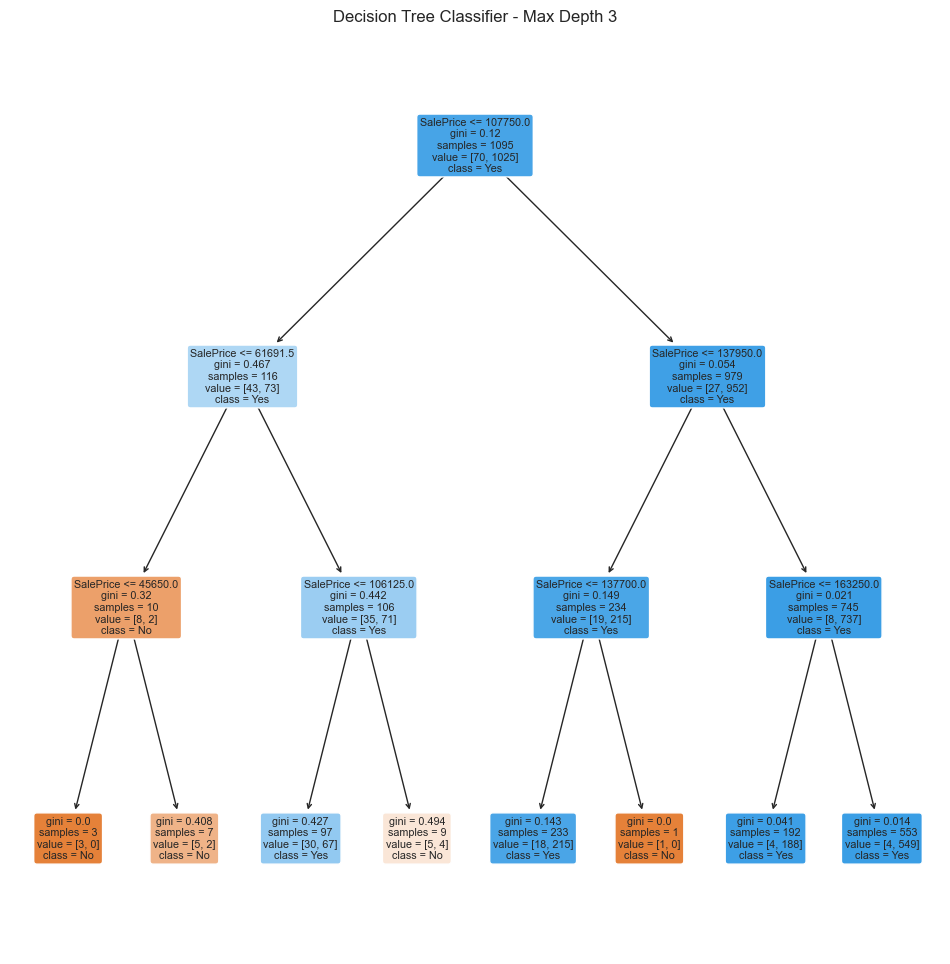

In [6]:
#plotting the first tree with max depth 3
f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=sp_train.columns, 
          class_names=["No","Yes"])
plt.title("Decision Tree Classifier - Max Depth 3")
plt.show()

In [7]:
# decision tree using Train Data with max depth 4
dectree2 = DecisionTreeClassifier(max_depth = 4)  
dectree2.fit(sp_train, ca_train)      

DecisionTreeClassifier(max_depth=4)

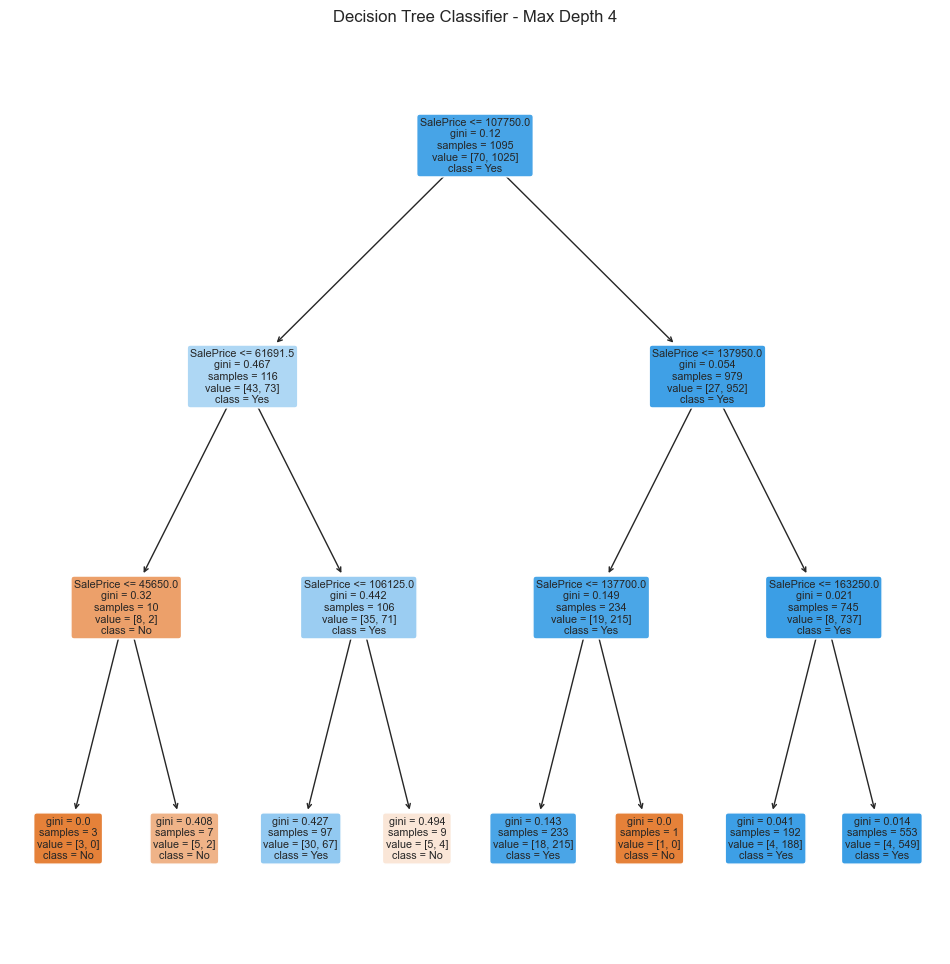

In [8]:
#plotting the first tree with max depth 4
f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=sp_train.columns, 
          class_names=["No","Yes"])
plt.title("Decision Tree Classifier - Max Depth 4")
plt.show()

Classification Accuracy for train set	: 0.94337899543379
Classification Accuracy for test set 	: 0.9424657534246575
False Positive Rate for train set: 0.8
True Positive Rate for train set: 0.9941463414634146


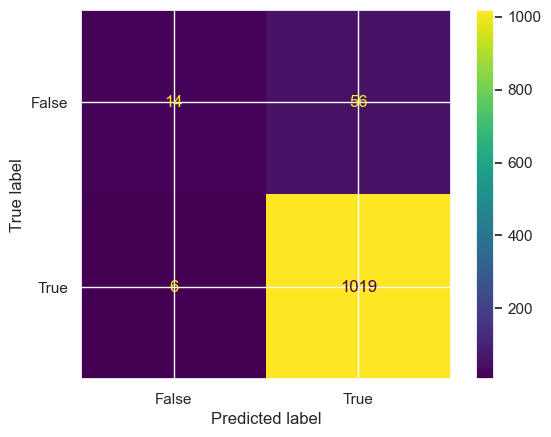

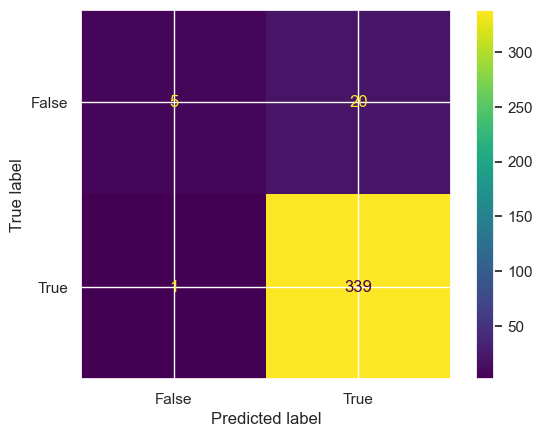

In [22]:
#Problem 1b

#Predict CentralAir corresponding to SalePrice using dectree1 (max depth 3)
ca_train_pred1 = dectree1.predict(sp_train)
ca_test_pred1 = dectree1.predict(sp_test)
print("Classification Accuracy for train set\t:", dectree1.score(sp_train, ca_train))
print("Classification Accuracy for test set \t:", dectree1.score(sp_test, ca_test))

fp1 = confusion_matrix(ca_train, ca_train_pred1)
fp1_rate = fp1[0][1]/(fp1[0][1]+fp1[0][0])
tp1_rate = fp1[1][1]/(fp1[1][0]+fp1[1][1])
print("False Positive Rate for train set:", fp1_rate)
print("True Positive Rate for train set:", tp1_rate) 

confusion_matrix_train1 = metrics.confusion_matrix(ca_train, ca_train_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train1, display_labels = [False, True])
cm_display.plot()
plt.show()

confusion_matrix_test1 = metrics.confusion_matrix(ca_test, ca_test_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test1, display_labels = [False, True])
cm_display.plot()
plt.show()




Classification Accuracy for train set	: 0.9442922374429223
Classification Accuracy for test set 	: 0.9397260273972603
False Positive Rate for train set: 0.8
True Positive Rate for train set: 0.9951219512195122


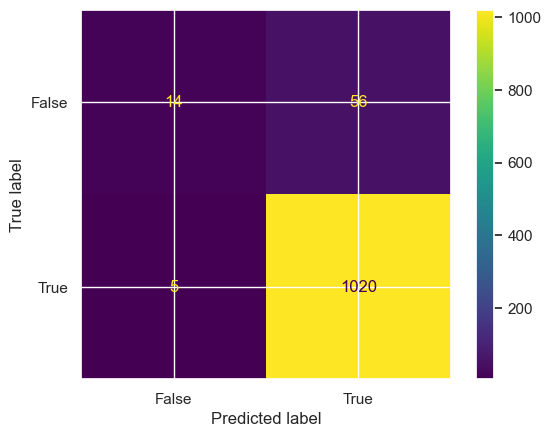

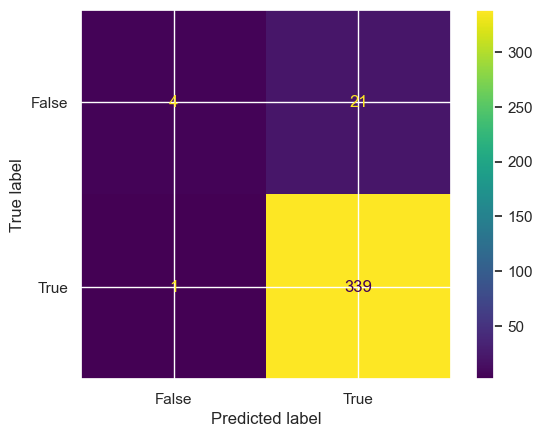

In [26]:
#Predict CentralAir corresponding to SalePrice using dectree1 (max depth 4)
ca_train_pred2 = dectree2.predict(sp_train)
ca_test_pred2 = dectree2.predict(sp_test)
print("Classification Accuracy for train set\t:", dectree2.score(sp_train, ca_train))
print("Classification Accuracy for test set \t:", dectree2.score(sp_test, ca_test))

fp2 = confusion_matrix(ca_train, ca_train_pred2)
fp2_rate = fp2[0][1]/(fp2[0][1]+fp2[0][0])
tp2_rate = fp2[1][1]/(fp2[1][0]+fp2[1][1])
print("False Positive Rate for train set:", fp2_rate)
print("True Positive Rate for train set:", tp2_rate) 

confusion_matrix_train2 = metrics.confusion_matrix(ca_train, ca_train_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train2, display_labels = [False, True])
cm_display.plot()
plt.show()

confusion_matrix_test2 = metrics.confusion_matrix(ca_test, ca_test_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [116]:
print('The classification accuracy for both models are very similar, with max depth 4 having a slightly lower classfication accuracy. Both of them have the same false positve rate and similar true positive rates. Thus, I would believe that the model with max depth 3 is better.')

The classification accuracy for both models are very similar, with max depth 4 having a slightly lower classfication accuracy. Both of them have the same false positve rate and similar true positive rates. Thus, I would believe that the model with max depth 3 is better.


In [30]:
#Problem 2

#extract predictors
oq = pd.DataFrame(housedata['OverallQual']) 
yb = pd.DataFrame(housedata['YearBuilt']) 

oq_train, oq_test, ca_train, ca_test = train_test_split(oq, ca, test_size = 0.25, random_state=27)
yb_train, yb_test, ca_train, ca_test = train_test_split(yb, ca, test_size = 0.25, random_state=27)

print("Train Set for OverallQual predictor:", ca_train.shape, sp_train.shape)
print("Test Set for OverallQual predictor:", ca_test.shape, sp_test.shape)
print("")
print("Train Set for YearBuilt predictor:", ca_train.shape, sp_train.shape)
print("Test Set for YearBuilt predictor:", ca_test.shape, sp_test.shape)

Train Set for OverallQual predictor: (1095, 1) (1095, 1)
Test Set for OverallQual predictor: (365, 1) (365, 1)

Train Set for YearBuilt predictor: (1095, 1) (1095, 1)
Test Set for YearBuilt predictor: (365, 1) (365, 1)


In [31]:
# Decision Tree using Train Data for OverallQual with max depth 3
dectreeoq = DecisionTreeClassifier(max_depth = 3)  
dectreeoq.fit(oq_train, ca_train)

DecisionTreeClassifier(max_depth=3)

Classification Accuracy for train set	: 0.9415525114155251
Classification Accuracy for test set 	: 0.9342465753424658
False Positive Rate for train set: 0.8
True Positive Rate for train set: 0.9921951219512195


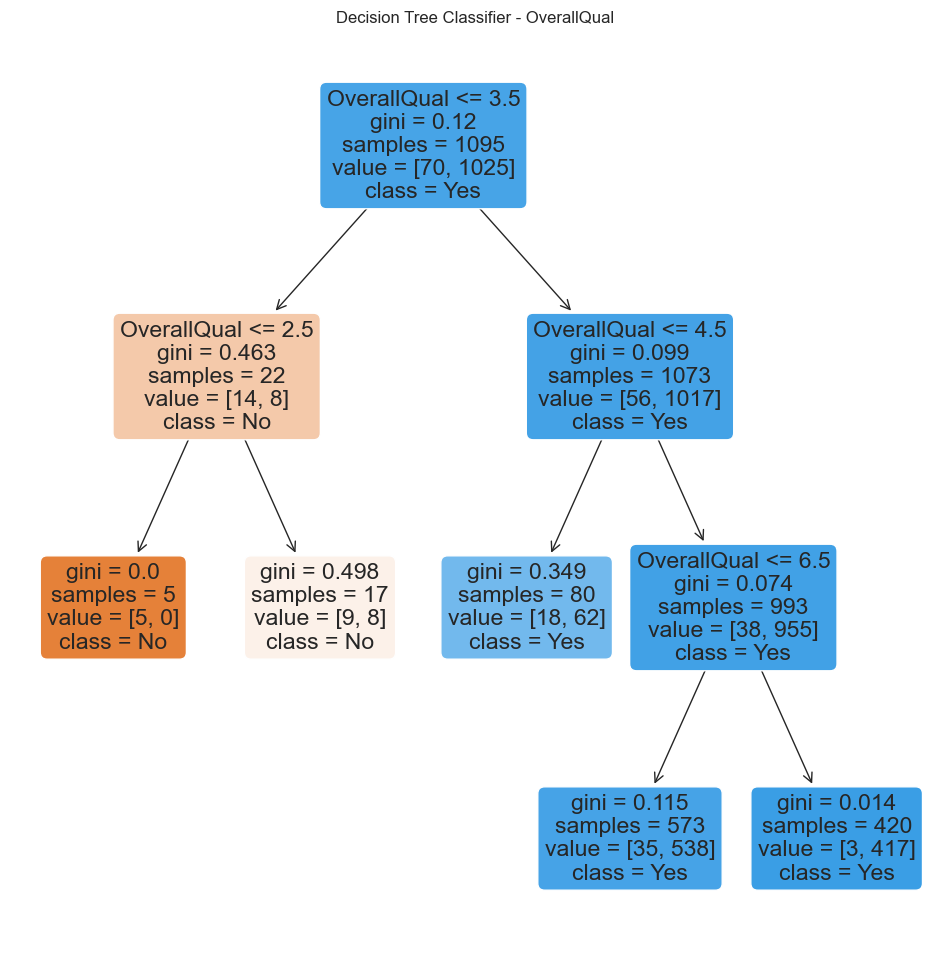

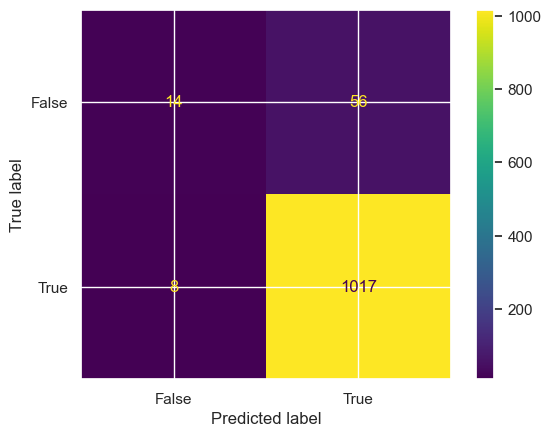

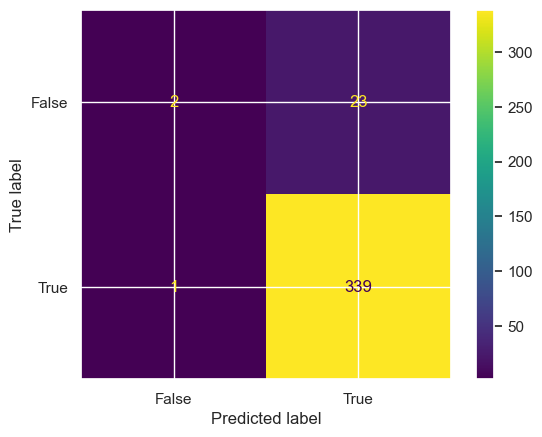

In [36]:
f = plt.figure(figsize=(12,12))

#Predict CentralAir corresponding to SalePrice using dectreeoq
ca_train_predoq = dectreeoq.predict(oq_train)
ca_test_predoq = dectreeoq.predict(oq_test)
print("Classification Accuracy for train set\t:", dectreeoq.score(oq_train, ca_train))
print("Classification Accuracy for test set \t:", dectreeoq.score(oq_test, ca_test))

fp_oq = confusion_matrix(ca_train, ca_train_predoq)
fp_oq_rate = fp_oq[0][1]/(fp_oq[0][1]+fp_oq[0][0])
tp_oq_rate = fp_oq[1][1]/(fp_oq[1][0]+fp_oq[1][1])
print("False Positive Rate for train set:", fp_oq_rate)
print("True Positive Rate for train set:", tp_oq_rate) 

plot_tree(dectreeoq, filled=True, rounded=True, 
          feature_names=oq_train.columns, 
          class_names=["No","Yes"])
plt.title("Decision Tree Classifier - OverallQual")
plt.show()

confusion_matrix_train_oq = metrics.confusion_matrix(ca_train, ca_train_predoq)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train_oq, display_labels = [False, True])
cm_display.plot()
plt.show()

confusion_matrix_test_oq = metrics.confusion_matrix(ca_test, ca_test_predoq)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test_oq, display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
# Decision Tree using Train Data for YearBuilt with max depth 3
dectreeyb = DecisionTreeClassifier(max_depth = 3)  
dectreeyb.fit(yb_train, ca_train)

DecisionTreeClassifier(max_depth=3)

Classification Accuracy for train set	: 0.9378995433789954
Classification Accuracy for test set 	: 0.9315068493150684
False Positive Rate for train set: 0.9714285714285714
True Positive Rate for train set: 1.0


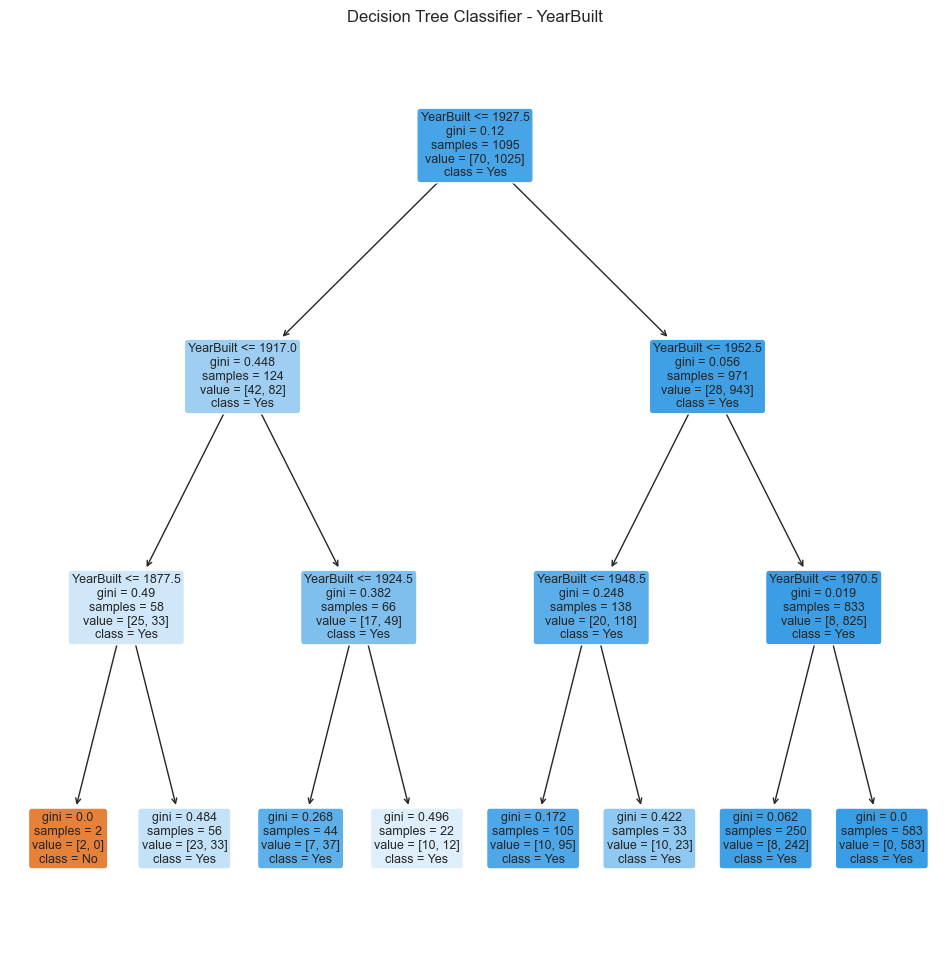

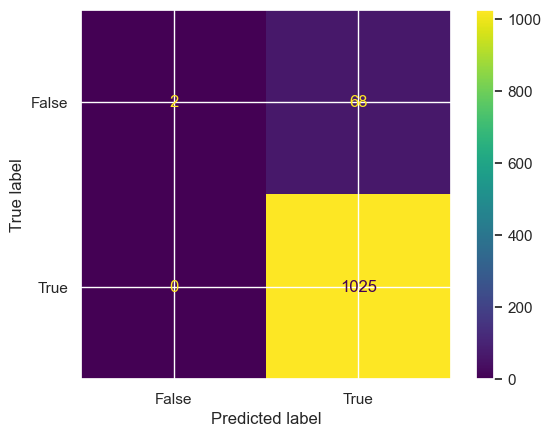

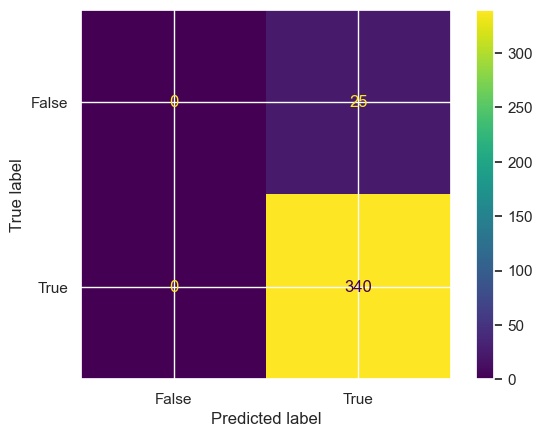

In [43]:
f = plt.figure(figsize=(12,12))

#Predict CentralAir corresponding to SalePrice using dectreeoq
ca_train_predyb = dectreeyb.predict(yb_train)
ca_test_predyb = dectreeyb.predict(yb_test)
print("Classification Accuracy for train set\t:", dectreeyb.score(yb_train, ca_train))
print("Classification Accuracy for test set \t:", dectreeyb.score(yb_test, ca_test))

fp_yb = confusion_matrix(ca_train, ca_train_predyb)
fp_yb_rate = fp_yb[0][1]/(fp_yb[0][0]+fp_yb[0][1])
tp_yb_rate = fp_yb[1][1]/(fp_yb[1][0]+fp_yb[1][1])
print("False Positive Rate for train set:", fp_yb_rate)
print("True Positive Rate for train set:", tp_yb_rate) 

plot_tree(dectreeyb, filled=True, rounded=True, 
          feature_names=yb_train.columns, 
          class_names=["No","Yes"])
plt.title("Decision Tree Classifier - YearBuilt")
plt.show()

confusion_matrix_train_yb = metrics.confusion_matrix(ca_train, ca_train_predyb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train_yb, display_labels = [False, True])
cm_display.plot()
plt.show()

confusion_matrix_test_yb = metrics.confusion_matrix(ca_test, ca_test_predyb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test_yb, display_labels = [False, True])
cm_display.plot()
plt.show()

In [44]:
print("Both models for OverallQual and YearBuilt have similar Classification Accuracies. However, the model for YearBuilt has a much higher False Positive rate, although it has a slightly higher true positive rate. Thus, between the 2, OverallQual would be the better model.")

Both models for OverallQual and YearBuilt have similar Classification Accuracies. However, the model for YearBuilt has a much higher False Positive rate, although it has a slightly higher true positive rate. Thus, between the 2, OverallQual would be the better model.


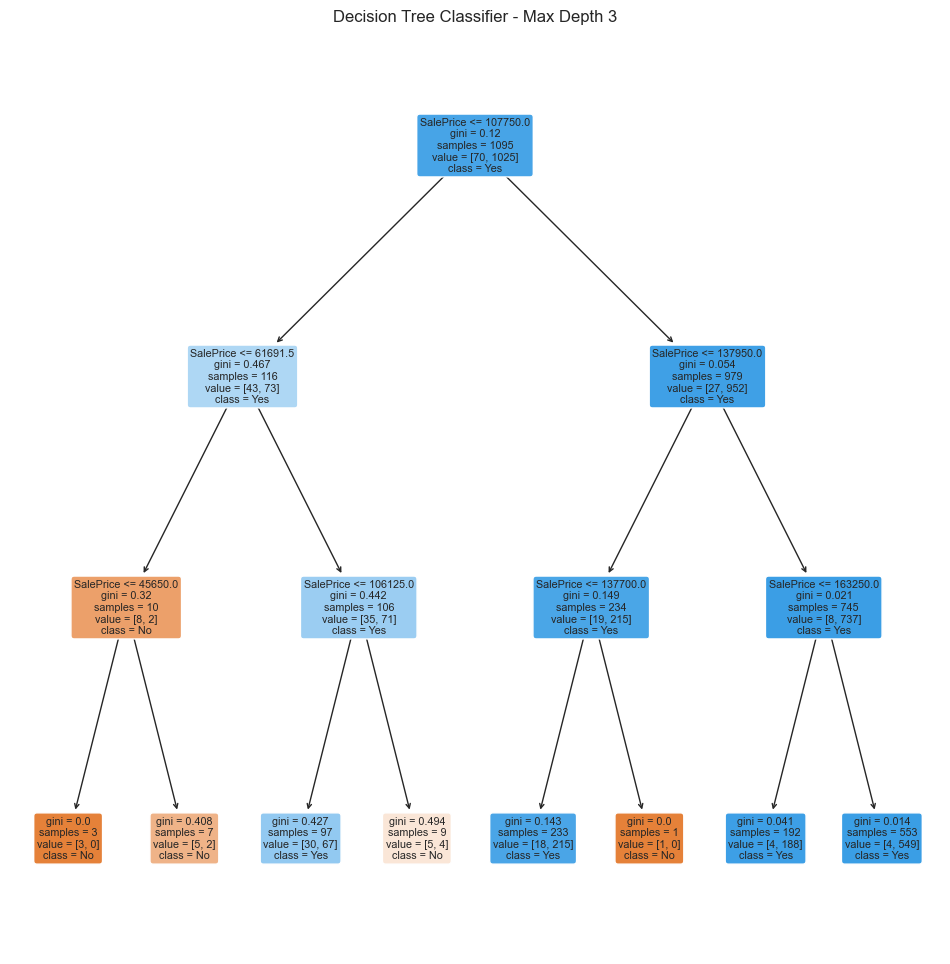

In [123]:
#problem 3 
#3(a)
f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=sp_train.columns, 
          class_names=["No","Yes"])
plt.title("Decision Tree Classifier - Max Depth 3")
plt.show()

In [124]:
print("Among all the leaf nodes, we look at the blue leaf nodes as those are the leaf nodes with the 'Yes' class, and the 3rd leaf node from the left has 30 false positives, and the smallest number of samples.")

Among all the leaf nodes, we look at the blue leaf nodes as those are the leaf nodes with the 'Yes' class, and the 3rd leaf node from the left has 30 false positives, and the smallest number of samples.


In [125]:
print("Samples in third leaf node from the left")
jointdf=pd.concat([sp_train, ca_train], axis=1).reindex(sp.index)
thirdleaf = jointdf[(jointdf['SalePrice']<=106125.0) & (jointdf['SalePrice']>61691.5)]
print(thirdleaf)

Samples in third leaf node from the left
      SalePrice CentralAir
17      90000.0          Y
29      68500.0          N
61     101000.0          N
68      80000.0          Y
75      91000.0          Y
...         ...        ...
1384   105000.0          Y
1404   105000.0          Y
1412    90000.0          N
1432    64500.0          Y
1453    84500.0          Y

[97 rows x 2 columns]


In [126]:
thirdleaf_fps=thirdleaf[thirdleaf['CentralAir']=='N']
thirdleaf_fps

,SalePrice,CentralAir
29,68500.0,N
61,101000.0,N
88,85000.0,N
125,84500.0,N
210,98000.0,N
242,79000.0,N
264,73000.0,N
325,87000.0,N
342,87500.0,N
352,95000.0,N
